In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [77]:
data = pd.read_csv('AL_Dados.csv')
data = data[['Município', 'Estabelecimentos de Saúde 2021', 'Densidade demografica 2021', 'IDHM [2010]']]
# data.set_index(['Município'], inplace=True)
data


,Município,Estabelecimentos de Saúde 2021,Densidade demografica 2021,IDHM [2010]
0,Maceió,1614,2025.44,0.721
1,Satuba,15,340.26,0.660
2,Arapiraca,342,677.87,0.649
3,Rio Largo,47,257.51,0.643
4,Marechal Deodoro,12,154.99,0.642
...,...,...,...,...
97,Roteiro,6,51.46,0.505
98,Mata Grande,11,27.55,0.504
99,Olho d'Água Grande,8,43.87,0.503
100,Olivença,8,66.63,0.493


In [78]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 9.79992358e+00,  9.25983635e+00,  3.99780557e+00],
       [-1.39123997e-01,  1.10429561e+00,  2.44944913e+00],
       [ 1.89343920e+00,  2.73818167e+00,  2.17023731e+00],
       [ 5.97812706e-02,  7.03821482e-01,  2.01793995e+00],
       [-1.57771365e-01,  2.07669121e-01,  1.99255706e+00],
       [ 3.27060223e-01,  2.45804906e-01,  1.89102549e+00],
       [ 3.58139171e-01, -9.24807952e-02,  1.68796235e+00],
       [ 3.83916417e-03, -2.31666729e-01,  1.58643078e+00],
       [ 6.59970602e-02,  3.56195418e-01,  1.51028210e+00],
       [-1.82634524e-01,  7.31106674e-03,  1.30721896e+00],
       [ 1.53018115e-01, -1.38166303e-01,  1.23107029e+00],
       [-9.56134695e-02,  1.15814148e-01,  1.18030450e+00],
       [-1.63987155e-01,  1.60870513e-01,  1.05339004e+00],
       [-8.93976799e-02,  1.45383900e-01,  1.02800715e+00],
       [ 2.87023226e-02, -1.89804478e-01,  8.50326899e-01],
       [-1.88850314e-01,  6.89254387e-01,  8.50326899e-01],
       [-1.20476628e-01, -2.59881402e-01

In [79]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
labels

array([1, 4, 2, 4, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 0, 3, 3, 0, 0,
       3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 4, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 3, 3, 4, 3, 0, 3, 0, 0, 0, 3, 3, 4, 3, 0, 0, 3, 3,
       3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [80]:
data["Cluster"] = labels
data.head(5)

,Município,Estabelecimentos de Saúde 2021,Densidade demografica 2021,IDHM [2010],Cluster
0,Maceió,1614,2025.44,0.721,1
1,Satuba,15,340.26,0.660,4
2,Arapiraca,342,677.87,0.649,2
3,Rio Largo,47,257.51,0.643,4
4,Marechal Deodoro,12,154.99,0.642,0


In [81]:
data.groupby('Cluster').mean()


,Estabelecimentos de Saúde 2021,Densidade demografica 2021,IDHM [2010]
Cluster,,,
0,25.138889,115.006389,0.574167
1,1614.000000,2025.440000,0.721000
2,342.000000,677.870000,0.649000
3,13.491228,51.347368,0.547895
4,26.142857,237.392857,0.601000


/tmp/ipykernel_5902/852350574.py:11: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



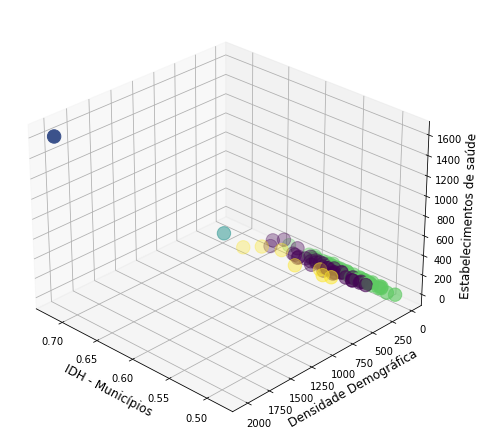

In [82]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=134)

plt.cla()
ax.set_xlabel('IDH - Municípios', fontsize=12)
ax.set_ylabel('Densidade Demográfica', fontsize=12)
ax.set_zlabel('Estabelecimentos de saúde', fontsize=12)

ax.scatter(X[:, 2], X[:, 1], X[:, 0], c= labels.astype(np.float), s=180)

In [ ]:
# Não funcionou

# from urllib.request import urlopen
# import json

# with urlopen('https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-27-mun.json') as response:
#     alagoas_cities = json.load(response)

# alagoas_cities['features'][0]['properties']

# cities_id_map = {}
# for feature in alagoas_cities['features']:
#     feature['cod'] = feature['properties']['id']
#     cities_id_map[feature['properties']['name']] = feature['cod']



# data['id'] = data['Município'].apply(lambda x: cities_id_map[x])
# data.head()

# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default = 'vscode'


# fig = px.choropleth(data,
#                     locations='id', 
#                     geojson=alagoas_cities, 
#                     color='Cluster', 
#                     hover_name='Município',
#                     hover_data=['Densidade demográfica 2010'])
# fig.update_geos(fitbounds="locations", visible=False)
# fig.show()